[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/5.1%20%EC%97%85%EC%A2%85%20%ED%85%8C%EB%A7%88%EC%A3%BC%20%EC%88%98%EC%A7%91-input.ipynb)

## 업종/테마 미션

* 팀장님이 우리 회사와 유사한 업종과 테마로 사업을 하고 있는 종목을 수집해서 분석해 달라는 미션을 주셨습니다.
* 코스피에서 해당 업종 혹은 테마의 시가총액이 가장 많은 종목을 찾아주세요.
* 해당 업종/테마의 거래량이 가장 많은 종목을 찾아주세요.
* 최근 52주 최고가에서 현재가 기준으로 가장 손실이 크게 난 종목은 어떤 종목일까요?
* 거래대금이 20위 안에 있는 코스피 종목 중에 "PER"가 가장 낮은 종목은 무엇일까요?


## 업종/테마주 수집

전체 실습을 하고 아래의 URL로 URL만 변경하게 되면 원하는 업종과 테마를 수집할 수 있습니다.

* 2차 전지 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=64
* 제약 업종 : https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261
* 코로나19(덱사메타손) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=442
* 제약업체 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=172
* 바이오시밀러(복제 바이오의약품) : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=241

In [1]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
font_family = get_font_family()

In [4]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
# 그래프 스타일 설정
plt.style.use("seaborn")

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp\ipykernel_24308\2960125416.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


<AxesSubplot:title={'center':'한글'}>

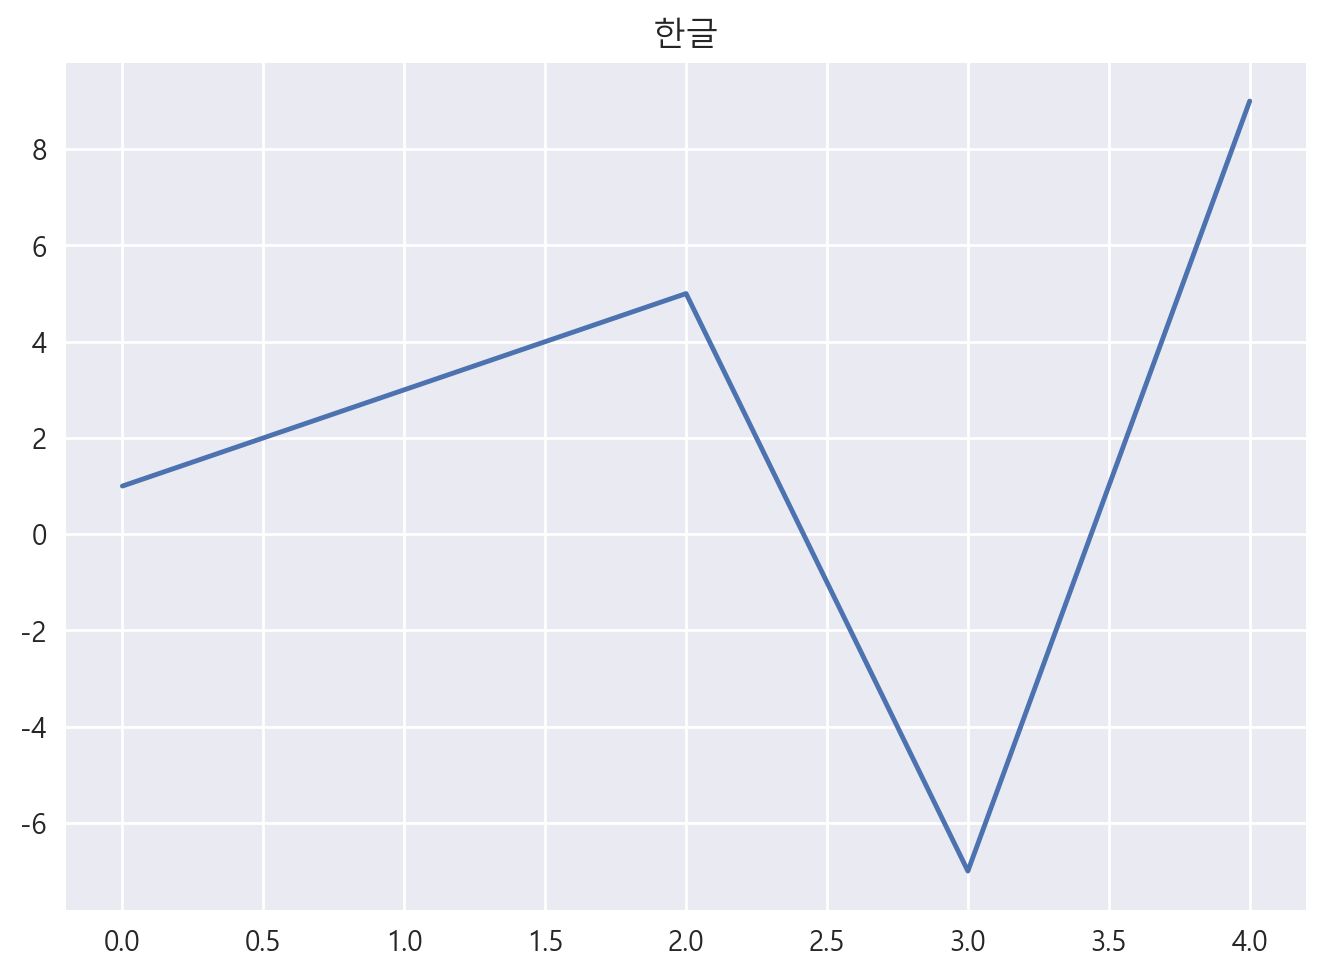

In [6]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

### 제약업종 수집하기
* https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261

In [10]:
# 수집할 업종/테마주소
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=261"

In [11]:
# read_html을 통해 해당 업종/테마를 수집합니다.
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [12]:
table

[   업종명    전일대비 전일대비 등락현황                   등락그래프
    업종명    전일대비        전체    상승    보합    하락 등락그래프
 0  NaN     NaN       NaN   NaN   NaN   NaN   NaN
 1   제약  +0.31%     177.0  74.0  17.0  86.0    2%
 2  NaN     NaN       NaN   NaN   NaN   NaN   NaN
 3  NaN     NaN       NaN   NaN   NaN   NaN   NaN,
      0      1          2        3          4       5
 0  거래량   매수호가   거래대금(백만)  시가총액(억)    영업이익(억)  PER(배)
 1   시가   매도호가      전일거래량  자산총계(억)    영업이익증가율  ROE(%)
 2   고가  매수총잔량      외국인비율  부채총계(억)   당기순이익(억)  ROA(%)
 3   저가  매도총잔량  상장주식수(천주)   매출액(억)   주당순이익(원)  PBR(배)
 4  NaN    NaN        NaN   매출액증가율  보통주배당금(원)  유보율(%),
              종목명     현재가      전일비      등락률    매수호가    매도호가        거래량    거래대금  \
 0            NaN     NaN      NaN      NaN     NaN     NaN        NaN     NaN   
 1      한국유니온제약 *  6220.0  상승  410   +7.06%  6220.0  6230.0    30120.0   184.0   
 2         에이비온 *  8200.0  상승  490   +6.36%  8190.0  8200.0   240152.0  1946.0   
 3    에이프로젠바이오로직스  1631.0   상승  90   +5.84%  1

In [13]:
# 데이터들은 table[2]에 존재
# dropna를 통해 결측치를 제거
# how='all' 이면 전부 결측치일시 row나 column을 제거
raw = table[2]
print(raw.shape)
raw = raw.dropna(how="all").dropna(axis=1, how="all")
raw.shape
# 3개의 row, 3개의 column이 제거되었습니다.

(180, 12)


(177, 9)

In [14]:
raw

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,한국유니온제약 *,6220.0,상승 410,+7.06%,6220.0,6230.0,30120.0,184.0,7041.0
2,에이비온 *,8200.0,상승 490,+6.36%,8190.0,8200.0,240152.0,1946.0,171467.0
3,에이프로젠바이오로직스,1631.0,상승 90,+5.84%,1631.0,1632.0,498832.0,802.0,155279.0
4,광동헬스바이오,2710.0,상승 105,+4.03%,2610.0,2675.0,2.0,5.0,891.0
5,대봉엘에스 *,10450.0,상승 400,+3.98%,10440.0,10450.0,203025.0,2095.0,84220.0
...,...,...,...,...,...,...,...,...,...
173,휴메딕스 *,33800.0,"하락 1,600",-4.52%,33750.0,33800.0,260196.0,8832.0,129861.0
174,대동고려삼,2825.0,하락 155,-5.20%,2555.0,2755.0,19.0,53.0,1.0
175,카이노스메드 *,4580.0,하락 335,-6.82%,4580.0,4585.0,899393.0,4133.0,2157480.0
176,엔지켐생명과학 *,1959.0,하락 256,-11.56%,1958.0,1959.0,1801863.0,3658.0,1109196.0


## 파생변수 만들기

In [15]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2024-05-12'

In [16]:
# 일자별로 데이터가 다르니 조회일자를 추가
raw["조회일자"] = today

In [17]:
# 조회일자가 추가되었는지 확인
raw.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,한국유니온제약 *,6220.0,상승 410,+7.06%,6220.0,6230.0,30120.0,184.0,7041.0,2024-05-12
2,에이비온 *,8200.0,상승 490,+6.36%,8190.0,8200.0,240152.0,1946.0,171467.0,2024-05-12
3,에이프로젠바이오로직스,1631.0,상승 90,+5.84%,1631.0,1632.0,498832.0,802.0,155279.0,2024-05-12
4,광동헬스바이오,2710.0,상승 105,+4.03%,2610.0,2675.0,2.0,5.0,891.0,2024-05-12
5,대봉엘에스 *,10450.0,상승 400,+3.98%,10440.0,10450.0,203025.0,2095.0,84220.0,2024-05-12


## 거래량과 거래대금 시각화

<AxesSubplot:ylabel='종목명'>

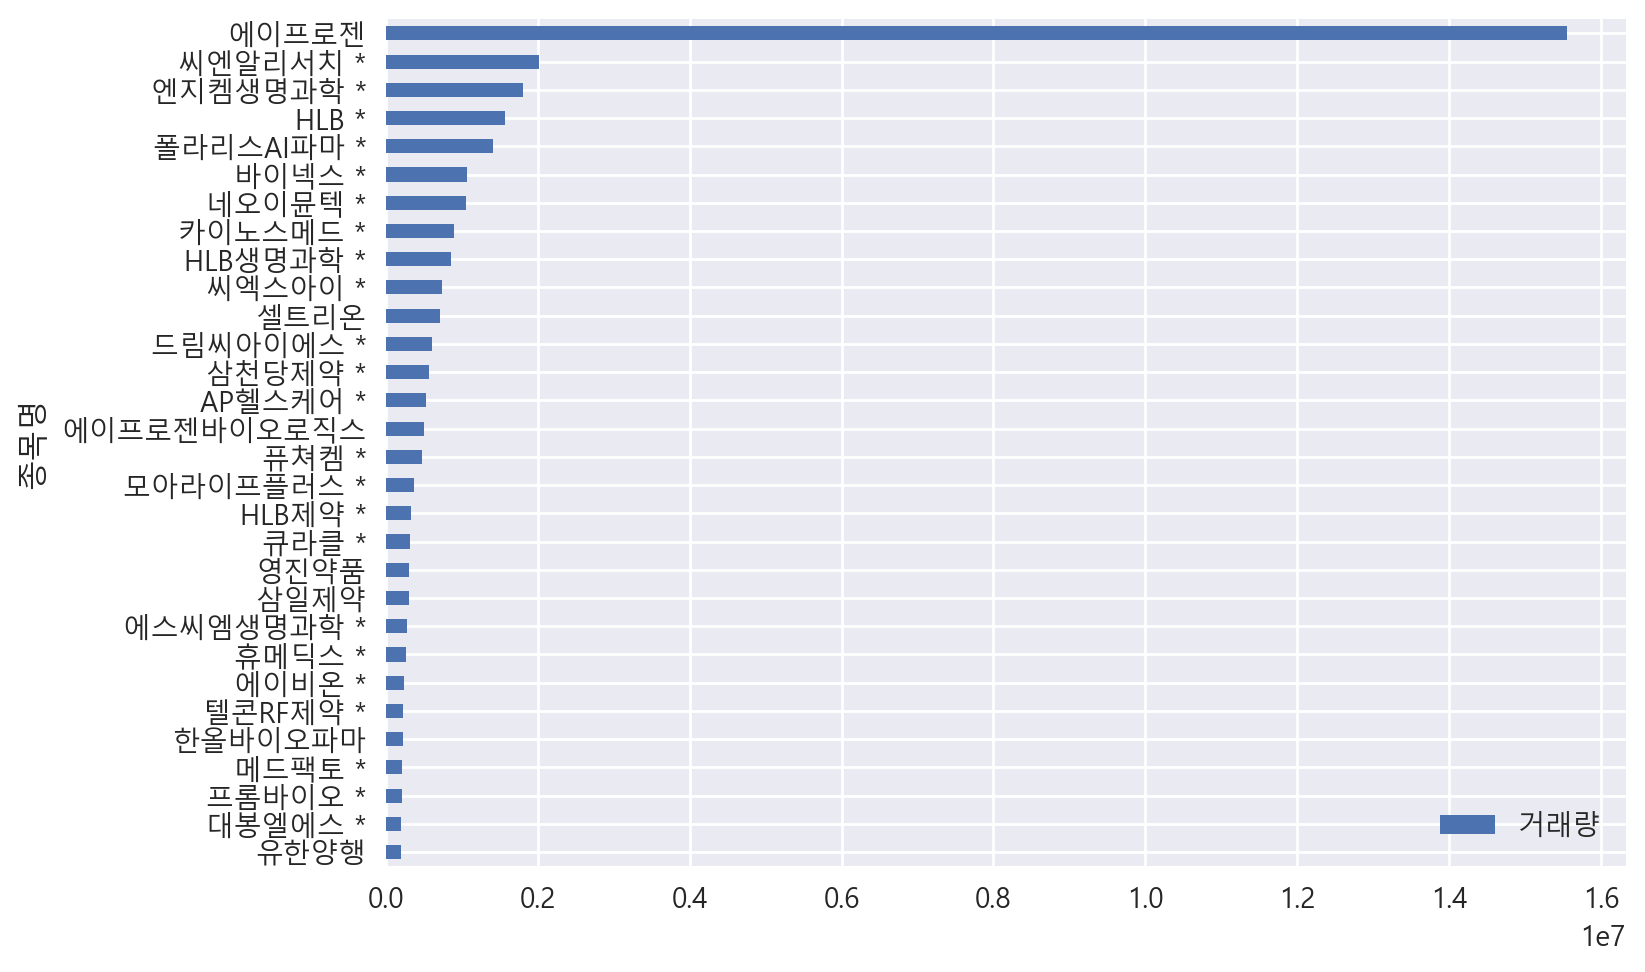

In [18]:
# 종목명 대비 거래량을 bar chart
# set_index를 해주면 plot시에 y axis label로 그려짐
# sort_values시의 기본값이 오름차순이므로
# DataFrame의 하위 30개를 가져와야 거래량 상위 30개의 종목을 시각화
temp = raw[["종목명", "거래량"]].sort_values("거래량")
temp.set_index("종목명").tail(30).plot.barh()

<AxesSubplot:ylabel='종목명'>

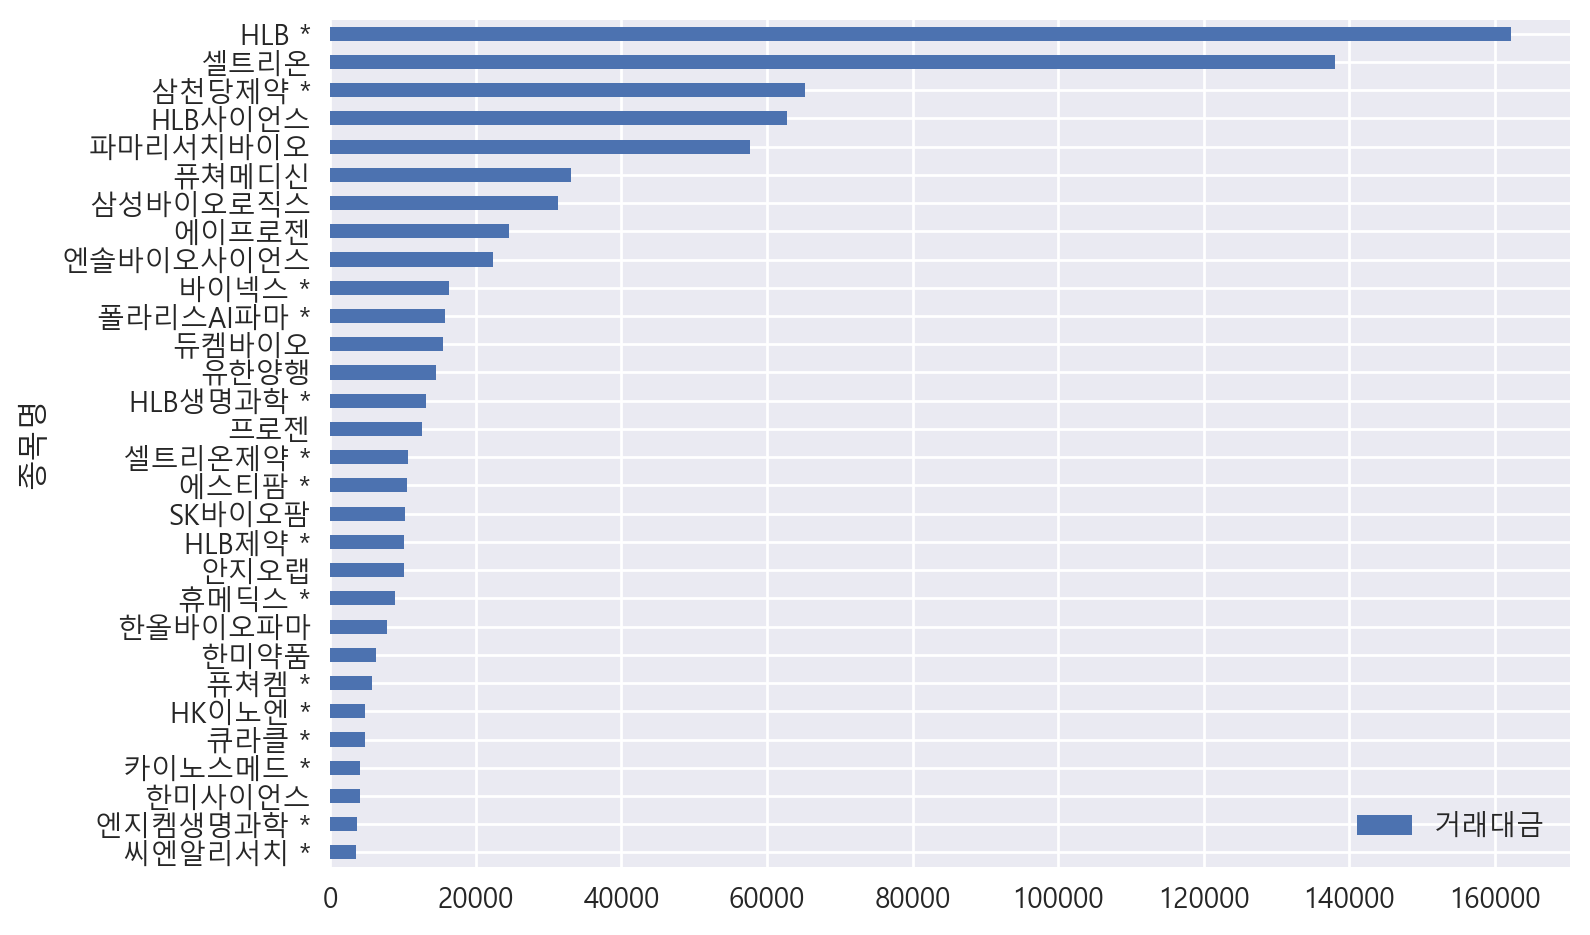

In [19]:
# 위와 동일한 방법으로 종목명 대비 거래대금의 bar chart를 시각화 합니다.
temp = raw[["종목명", "거래대금"]].set_index("종목명")
temp = temp.sort_values("거래대금").tail(30)
temp.plot.barh()

## 종목코드 병합
* 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [20]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줌
raw["종목명_전처리"] = raw["종목명"].str.replace("*", "")
raw["종목명_전처리"] = raw["종목명_전처리"].str.strip()

C:\Users\user\AppData\Local\Temp\ipykernel_24308\1015857942.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  raw["종목명_전처리"] = raw["종목명"].str.replace("*", "")


In [21]:
# raw 변수에 담긴 데이터프레임을 확인합니다.
raw[["종목명", "종목명_전처리"]].head()

,종목명,종목명_전처리
1,한국유니온제약 *,한국유니온제약
2,에이비온 *,에이비온
3,에이프로젠바이오로직스,에이프로젠바이오로직스
4,광동헬스바이오,광동헬스바이오
5,대봉엘에스 *,대봉엘에스


In [22]:
# 저장해 두었던 전체거래소목록(krx.csv) 파일을 불러오거나 
# FinanceDataReader로 StockListing을 다시 받아서 df_krx 라는 변수에 담기
import FinanceDataReader as fdr
df_krx = fdr.StockListing("KRX")
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,79200,2,-500,-0.63,80400,81100,78900,16976124,1351235284800,472806777960000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,179900,1,4500,2.57,176500,180100,176400,2813668,503861705500,130967625463500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,383500,2,-5000,-1.29,390500,390500,383500,115093,44349447000,89739000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,787000,1,6000,0.77,789000,794000,783000,65984,52121009000,56013938000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,64800,2,-800,-1.22,65800,66300,64800,967109,63047032700,53323058160000,822886700,STK


### merge 를 통한 종목코드 만들기
* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png">

In [24]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져오기
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듬
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면 
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듬
df_item_code_name = df_krx[["Code", "Name"]]
df_item_code_name.columns = ["종목코드", "종목명_전처리"]
df_item_code_name.head()

,종목코드,종목명_전처리
0,005930,삼성전자
1,000660,SK하이닉스
2,373220,LG에너지솔루션
3,207940,삼성바이오로직스
4,005935,삼성전자우


In [25]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력
raw.shape

(177, 11)

In [26]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합
# df
df = raw.merge(df_item_code_name, on="종목명_전처리", how='left')
df.shape

(177, 12)

In [27]:
# 병합이 잘 되었는지 확인합니다.
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,한국유니온제약 *,6220.0,상승 410,+7.06%,6220.0,6230.0,30120.0,184.0,7041.0,2024-05-12,한국유니온제약,080720
1,에이비온 *,8200.0,상승 490,+6.36%,8190.0,8200.0,240152.0,1946.0,171467.0,2024-05-12,에이비온,203400
2,에이프로젠바이오로직스,1631.0,상승 90,+5.84%,1631.0,1632.0,498832.0,802.0,155279.0,2024-05-12,에이프로젠바이오로직스,003060
3,광동헬스바이오,2710.0,상승 105,+4.03%,2610.0,2675.0,2.0,5.0,891.0,2024-05-12,광동헬스바이오,086220
4,대봉엘에스 *,10450.0,상승 400,+3.98%,10440.0,10450.0,203025.0,2095.0,84220.0,2024-05-12,대봉엘에스,078140


## 종목상세정보 수집

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [28]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집
item_code = "068270"
item_name = "셀트리온"

In [30]:
# 종목상세정보를 위한 url을 확보
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있음
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
item_url

'https://finance.naver.com/item/main.nhn?code=068270'

In [32]:
# read_html을 이용해 데이터를 수집
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [33]:
# 제대로 수집이 되었는지 확인
tables[3].iloc[:, [0, -1]]

,주요재무정보,최근 분기 실적
,주요재무정보,2024.03(E)
,주요재무정보,IFRS연결
0,매출액,7255.00
1,영업이익,61.00
2,당기순이익,58.00
3,영업이익률,0.84
4,순이익률,0.79
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [34]:
# tables의 원소값을 확인하여 원하는 데이터를 확인
pd.concat([tables[6], tables[7], tables[8], tables[9]]).set_index(0).T

,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.12),추정PERlEPS,PBRlBPS (2023.12),배당수익률l2023.12,동일업종 PER,동일업종 등락률
1,216929838,52497462,24.20%,"4.00매수 l 231,818","241,000 l 131,000","53.01배 l 3,639원","79.00배 l 2,453원","2.40배 l 80,331원",0.26%,101.57배,+0.31%


## 컬럼명과 값 형태로 되어 있는 테이블만 사용

In [42]:
# 수집한 정보를 item_info에 list 형태로 관리
item_info = []

In [43]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수로 선언
finance_info = tables[3].iloc[:, [0, -1]]
finance_info.columns = [0, 1]
item_info.append(finance_info)

In [49]:
item_info

[            0         1
 0         매출액   7255.00
 1        영업이익     61.00
 2       당기순이익     58.00
 3       영업이익률      0.84
 4        순이익률      0.79
 5   ROE(지배주주)       NaN
 6        부채비율       NaN
 7        당좌비율       NaN
 8         유보율       NaN
 9      EPS(원)     17.00
 10     PER(배)  10992.63
 11     BPS(원)       NaN
 12     PBR(배)       NaN
 13   주당배당금(원)       NaN
 14   시가배당률(%)       NaN
 15    배당성향(%)       NaN,
           0               1
 0      시가총액  41조  8,458  억원
 1    시가총액순위          코스피 8위
 2     상장주식수       216929838
 3  액면가l매매단위   1,000원  l  1주,
              0          1
 0  외국인한도주식수(A)  216929838
 1  외국인보유주식수(B)   52497462
 2  외국인소진율(B/A)     24.20%,
            0                    1
 0  투자의견l목표주가   4.00매수  l  231,818
 1   52주최고l최저  241,000  l  131,000,
                    0                  1
 0   PERlEPS(2023.12)  53.01배  l  3,639원
 1          추정PERlEPS  79.00배  l  2,453원
 2  PBRlBPS (2023.12)  2.40배  l  80,331원
 3      배당수익률l2023.12              0.26%,
       

In [44]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출,
# 위에서 만든 item_info 에 리스트 형태로 추가
for t in tables:
    if t.shape[1] == 2:
        item_info.append(t)

In [45]:
# 위에서 만든 리스트의 값을 확인
item_info

[            0         1
 0         매출액   7255.00
 1        영업이익     61.00
 2       당기순이익     58.00
 3       영업이익률      0.84
 4        순이익률      0.79
 5   ROE(지배주주)       NaN
 6        부채비율       NaN
 7        당좌비율       NaN
 8         유보율       NaN
 9      EPS(원)     17.00
 10     PER(배)  10992.63
 11     BPS(원)       NaN
 12     PBR(배)       NaN
 13   주당배당금(원)       NaN
 14   시가배당률(%)       NaN
 15    배당성향(%)       NaN,
           0               1
 0      시가총액  41조  8,458  억원
 1    시가총액순위          코스피 8위
 2     상장주식수       216929838
 3  액면가l매매단위   1,000원  l  1주,
              0          1
 0  외국인한도주식수(A)  216929838
 1  외국인보유주식수(B)   52497462
 2  외국인소진율(B/A)     24.20%,
            0                    1
 0  투자의견l목표주가   4.00매수  l  231,818
 1   52주최고l최저  241,000  l  131,000,
                    0                  1
 0   PERlEPS(2023.12)  53.01배  l  3,639원
 1          추정PERlEPS  79.00배  l  2,453원
 2  PBRlBPS (2023.12)  2.40배  l  80,331원
 3      배당수익률l2023.12              0.26%,
       

## concat을 통해 데이터를 병합

* concat과 merge의 차이
    * concat :  
        * axis=0 행을 기준으로 위아래로 같은 컬럼끼리 값을 이어 붙여 새로운 행을 만듦
        * axis=1 컬럼을 기준으로 인덱스가 같은 값을 옆으로 붙여 새로운 컬럼을 만듦
    * merge :
        * index 혹은 특정 컬럼 값을 기준으로 두 개의 데이터프레임을 연결

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_keys.png">

In [50]:
# item_info[0] 의 컬럼명 보기
item_info[2]

,0,1
0,외국인한도주식수(A),216929838
1,외국인보유주식수(B),52497462
2,외국인소진율(B/A),24.20%


In [73]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만들기
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,7255.0
1,영업이익,61.0
2,당기순이익,58.0
3,영업이익률,0.84
4,순이익률,0.79
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),17.0


## transpose를 통해 행과 열의 위치를 변경

In [74]:
df_item.set_index(0)

,1
0,
매출액,7255.0
영업이익,61.0
당기순이익,58.0
영업이익률,0.84
순이익률,0.79
ROE(지배주주),NaN
부채비율,NaN
당좌비율,NaN
유보율,NaN


In [75]:
# transpose는 .transpose() 혹은  .T 로 사용
df_item.set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.12),추정PERlEPS,PBRlBPS (2023.12),배당수익률l2023.12,동일업종 PER,동일업종 등락률
1,7255.0,61.0,58.0,0.84,0.79,NaN,NaN,NaN,NaN,17.0,...,52497462,24.20%,"4.00매수 l 231,818","241,000 l 131,000","53.01배 l 3,639원","79.00배 l 2,453원","2.40배 l 80,331원",0.26%,101.57배,+0.31%


## 개별 주가 정보를 수집하는 함수를 생성

In [76]:
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 주므로, sleep을 사용해서 서버에 무리한 요청을 하지 않음
import time

def get_item_info(item_code):
    
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")
    
    item_info = []
    finance_info = tables[3].iloc[:, [0, -1]]
    finance_info.columns = [0, 1]
    item_info.append(finance_info)
    
    for t in tables:
        if t.shape[1] == 2:
            item_info.append(t)
            
    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    time.sleep(0.1)
    return df_item

In [77]:
# 데이터프레임 형태로 종목정보를 수집
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2023.12),추정PERlEPS,PBRlBPS (2023.12),배당수익률l2023.12,동일업종 PER,동일업종 등락률
1,7255.0,61.0,58.0,0.84,0.79,NaN,NaN,NaN,NaN,17.0,...,52497462,24.20%,"4.00매수 l 231,818","241,000 l 131,000","53.01배 l 3,639원","79.00배 l 2,453원","2.40배 l 80,331원",0.26%,101.57배,+0.31%


## tqdm은?
* 오래 걸리는 작업의 진행 상태를 표시합니다.
* https://tqdm.github.io/

In [78]:
# tqdm은 total quality data management의 약자
# tqdm.auto 에서 tqdm을 불러오기
from tqdm.auto import tqdm
tqdm.pandas()

In [79]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장
result = df["종목코드"].progress_apply(get_item_info)

  0%|          | 0/177 [00:00<?, ?it/s]

In [110]:
result

0      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
1      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
2      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
3      0     액면가l매매단위 자본금(백만원)            상장일     시가총...
4      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
                             ...                        
172    0    매출액   영업이익 당기순이익 영업이익률   순이익률 ROE(지배주주) 부...
173    0     액면가l매매단위 자본금(백만원)            상장일     시가총...
174    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
175    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
176    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
Name: 종목코드, Length: 177, dtype: object

## concat 을 통한 데이터 프레임 합치기
* 수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [128]:
# result 리스트에서 '액면가'라는 키워드가 있는 DataFrame의 인덱스를 찾습니다.
indexes_to_remove = [i for i, df in enumerate(result) if '자본금(백만원)' in df.columns]
indexes_to_remove

[3, 34, 36, 37, 39, 55, 61, 66, 83, 88, 89, 153, 173]

In [129]:
result = [df for i, df in enumerate(result) if i not in indexes_to_remove]

In [134]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만들기
df_item_info = pd.concat(result)
df_item_info = df_item_info.reset_index()
df_item_info["종목코드"] = df["종목코드"]
del df_item_info["index"]

In [136]:
df_item_info.head()

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,동일업종 PER,동일업종 등락률,배당수익률l2023.12,배당수익률l2024.02,PERlEPS(2024.02),PBRlBPS (2024.02),배당수익률l2024.03,배당수익률l2024.01,배당수익률l2024.04,종목코드
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,080720
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203400
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,003060
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.57배,+0.31%,0.48%,NaN,NaN,NaN,NaN,NaN,NaN,086220
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,078140


In [137]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df.shape

(177, 12)

## merge 를 통한 데이터프레임 합치기
* 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [138]:
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,한국유니온제약 *,6220.0,상승 410,+7.06%,6220.0,6230.0,30120.0,184.0,7041.0,2024-05-12,한국유니온제약,080720
1,에이비온 *,8200.0,상승 490,+6.36%,8190.0,8200.0,240152.0,1946.0,171467.0,2024-05-12,에이비온,203400
2,에이프로젠바이오로직스,1631.0,상승 90,+5.84%,1631.0,1632.0,498832.0,802.0,155279.0,2024-05-12,에이프로젠바이오로직스,003060
3,광동헬스바이오,2710.0,상승 105,+4.03%,2610.0,2675.0,2.0,5.0,891.0,2024-05-12,광동헬스바이오,086220
4,대봉엘에스 *,10450.0,상승 400,+3.98%,10440.0,10450.0,203025.0,2095.0,84220.0,2024-05-12,대봉엘에스,078140


In [139]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합치기
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge
df_info = df.merge(df_item_info)

In [140]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있음
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

((177, 12), (164, 39), (164, 50))

In [141]:
# 일부 데이터만 가져와서 확인합니다.
df_info.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2023.12,배당수익률l2024.02,PERlEPS(2024.02),PBRlBPS (2024.02),배당수익률l2024.03,배당수익률l2024.01,배당수익률l2024.04
0,한국유니온제약 *,6220.0,상승 410,+7.06%,6220.0,6230.0,30120.0,184.0,7041.0,2024-05-12,...,NaN,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,에이비온 *,8200.0,상승 490,+6.36%,8190.0,8200.0,240152.0,1946.0,171467.0,2024-05-12,...,NaN,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,에이프로젠바이오로직스,1631.0,상승 90,+5.84%,1631.0,1632.0,498832.0,802.0,155279.0,2024-05-12,...,NaN,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,광동헬스바이오,2710.0,상승 105,+4.03%,2610.0,2675.0,2.0,5.0,891.0,2024-05-12,...,NaN,101.57배,+0.31%,0.48%,NaN,NaN,NaN,NaN,NaN,NaN
4,대봉엘에스 *,10450.0,상승 400,+3.98%,10440.0,10450.0,203025.0,2095.0,84220.0,2024-05-12,...,NaN,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 파일명 만들기

In [142]:
# 파일 이름을 url의 정보를 이용하여 만들기
# 업종_no_번호_날짜.csv, 혹은 테마_no_번호.csv 형태로 만들기
# file_name

file_name_1 = url.split("=")[1].replace("&", "_")
file_name_2 = url.split("=")[2]
file_name = f"{file_name_1}_{file_name_2}_{today}.csv"
file_name

'upjong_no_261_2024-05-12.csv'

In [144]:
# csv 파일로 저장
df_info.to_csv(file_name, index=False)

In [145]:
# 제대로 저장되었는지 확인
pd.read_csv(file_name)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,배당수익률,동일업종 PER,동일업종 등락률,배당수익률l2023.12,배당수익률l2024.02,PERlEPS(2024.02),PBRlBPS (2024.02),배당수익률l2024.03,배당수익률l2024.01,배당수익률l2024.04
0,한국유니온제약 *,6220.0,상승 410,+7.06%,6220.0,6230.0,30120.0,184.0,7041.0,2024-05-12,...,NaN,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,에이비온 *,8200.0,상승 490,+6.36%,8190.0,8200.0,240152.0,1946.0,171467.0,2024-05-12,...,NaN,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,에이프로젠바이오로직스,1631.0,상승 90,+5.84%,1631.0,1632.0,498832.0,802.0,155279.0,2024-05-12,...,NaN,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,광동헬스바이오,2710.0,상승 105,+4.03%,2610.0,2675.0,2.0,5.0,891.0,2024-05-12,...,NaN,101.57배,+0.31%,0.48%,NaN,NaN,NaN,NaN,NaN,NaN
4,대봉엘에스 *,10450.0,상승 400,+3.98%,10440.0,10450.0,203025.0,2095.0,84220.0,2024-05-12,...,NaN,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,부광약품,6600.0,하락 120,-1.79%,6600.0,6610.0,184849.0,1225.0,659661.0,2024-05-12,...,NaN,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,동아쏘시오홀딩스,105500.0,"하락 2,000",-1.86%,105500.0,105800.0,8208.0,870.0,7341.0,2024-05-12,...,NaN,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,1.55%
161,에이프릴바이오 *,15190.0,하락 290,-1.87%,15190.0,15200.0,134956.0,2065.0,166529.0,2024-05-12,...,NaN,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,HLB제약 *,30400.0,하락 850,-2.72%,30350.0,30400.0,330123.0,10167.0,448576.0,2024-05-12,...,NaN,101.57배,+0.31%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
